In [1]:
#load packages 
import numpy as np
import pandas as pd
import scipy
import re
from PIL import Image
import glob
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from datetime import date
from itertools import islice
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import utils
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
model = load_model("../model/final_movie_poster_2020-05-30/")

In [4]:
#grab file path names
image_paths = glob.glob("../data/movie-genre-from-its-poster/TestPoster/*.jpg")
image_ids = []
for path in image_paths:
    start = path.rfind("/") +1
    end = len(path) - 4
    image_ids.append(path[start:end])

In [5]:
df_movie = pd.read_excel("../data/01_test_posters.xlsx")

In [6]:
df_img_path = pd.DataFrame(image_paths)
df_img_path = df_img_path.rename(columns={0:'image_path'})
df_img_path['imdbId'] = image_ids

In [7]:
df_movie['imdbId'] = df_movie['imdbId'].astype(int)
df_img_path['imdbId'] = df_img_path['imdbId'].astype(int)

In [8]:
df_movie = pd.merge(df_movie, df_img_path, left_on='imdbId', right_on='imdbId')
df_movie = df_movie.drop_duplicates(subset=['imdbId'], keep="first")
image_paths = df_movie["image_path"].to_list()

In [9]:
df_movie["Genre"] = df_movie["Genre"].str.split("|")

In [10]:
y = df_movie["Genre"]

In [11]:
target_key = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Thriller', 'War', 'Western']

In [12]:
target_labels = target_key
total_classes = len(set(target_labels))
print("number of genre:", total_classes)

number of genre: 24


In [13]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [14]:
# results = {}
# img = img_test_predict
# proba = model.predict(img)[0]
# idxs = np.argsort(proba)[::-1][:2]

# for j in range(0, len(proba)):
#     results[target_key[j]] = proba[j] * 100
        
# results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}
# take(4, results.items())

In [34]:
def poster_classification(img_idx, target_key=target_key, model=model):
    
    img_num = img_idx
    img_path_find = image_paths[img_num]
    img_height = 268
    img_width = 182

    img_test_predict = np.array([img_to_array(
                        load_img(image_paths[img_num], target_size=(img_height, img_width)))])
    img_test_predict = img_test_predict.astype('float32')/255.0


    results = {}
    img = img_test_predict
    proba = model.predict(img)[0]
    idxs = np.argsort(proba)[::-1][:2]

    for j in range(0, len(proba)):
        results[target_key[j]] = proba[j] * 100

    results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}
    top_4 = take(4, results.items())
    print(top_4)
    
    print(df_movie.query('image_path == @img_path_find')['Genre'].to_list()[0])
            
    plt.imshow(img[0]);
    plt.grid(True);
    plt.xticks([]);
    plt.yticks([]);

[('Drama', 28.500676155090332), ('Comedy', 22.498564422130585), ('Romance', 8.977990597486496), ('Action', 8.57831984758377)]
['Comedy', 'Romance']


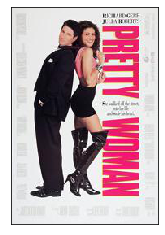

In [35]:
poster_classification(3)

[('Drama', 30.11680543422699), ('Comedy', 23.06995391845703), ('Action', 11.310230195522308), ('Romance', 6.99549987912178)]
['Comedy', 'Drama', 'Family']


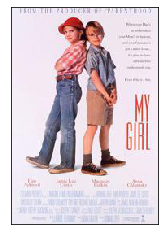

In [36]:
poster_classification(8)

[('Drama', 33.912014961242676), ('Comedy', 21.01411074399948), ('Romance', 8.34186002612114), ('Action', 7.830803096294403)]
['Comedy', 'Romance']


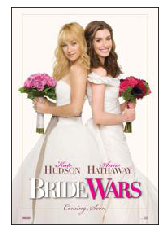

In [37]:
poster_classification(7)

[('Drama', 26.642391085624695), ('Comedy', 18.85363906621933), ('Action', 8.349177241325378), ('Crime', 5.9777285903692245)]
['Comedy', 'Drama', 'Romance']


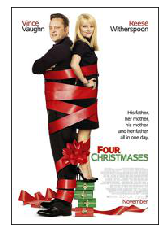

In [38]:
poster_classification(5)

[('Drama', 21.311038732528687), ('Horror', 13.070914149284363), ('Comedy', 11.877508461475372), ('Action', 11.836228519678116)]
['Comedy', 'Fantasy', 'Romance']


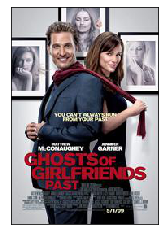

In [39]:
poster_classification(10)

[('Drama', 24.8466357588768), ('Comedy', 15.122602880001068), ('Action', 8.879286050796509), ('Romance', 8.63586887717247)]
['Comedy', 'Crime', 'Romance']


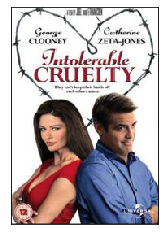

In [40]:
poster_classification(4)

[('Drama', 25.84775686264038), ('Action', 6.7006900906562805), ('Comedy', 6.436554342508316), ('Adventure', 4.991000145673752)]
['Comedy']


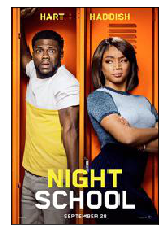

In [41]:
poster_classification(9)

[('Drama', 30.38524091243744), ('Action', 17.574486136436462), ('Comedy', 14.463064074516296), ('Romance', 6.850488483905792)]
['Comedy', 'Romance']


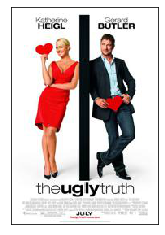

In [42]:
poster_classification(6)